In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import math 

from scipy import stats
from .helpers import cast_str_to_float_age
from .helpers import equalise_proportions
from .helpers import subset_max_records_per_comparison
from .helpers import add_jitter
from .helpers import relrisk

pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
# pd.set_option('display.width', 200)

INFILE = '/home/grace/work/SEER/data/SEER_2010_2020_RICH.clean.tsv'

In [ ]:
table = pd.read_csv(INFILE, sep='\t', header=0)
c_counts = table['cancer_group'].value_counts()
valid = set(c_counts[c_counts>=10000].index.to_list())
table = table[table['cancer_group'].isin(valid)]
table['age_numeric'] = table['age'].apply(cast_str_to_float_age)

/tmp/ipykernel_13947/3591860609.py:1: DtypeWarning: Columns (20,21,22,27,28,29,35,36,37,39,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  table = pd.read_csv(INFILE, sep='\t', header=0)


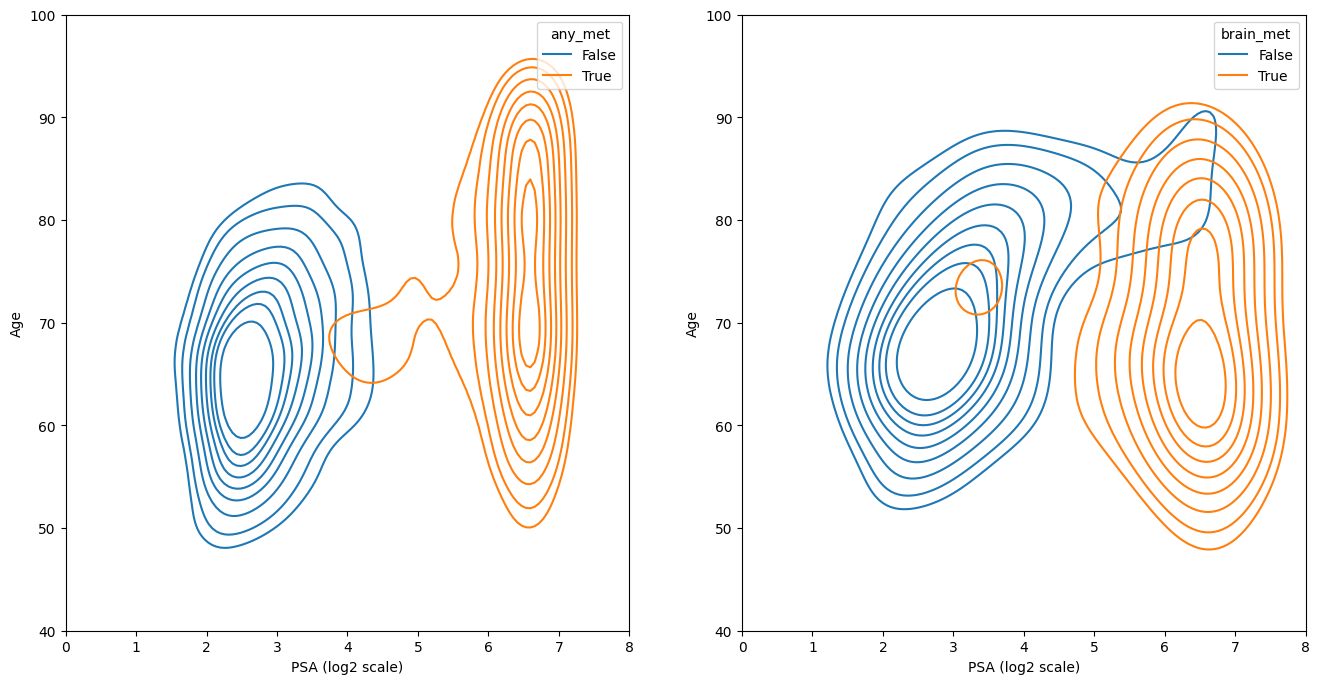

In [ ]:
# age, PSA 
df = table[table['cancer_group']=='Prostate']
df = df.dropna(subset=['PSA', 'age'])

df['age_jitter'] = add_jitter(df['age_numeric'], 2.5)
df['PSA_log'] = df['PSA'].apply(lambda x: math.log(x, 2))

df_any = df.dropna(subset=['any_met'])
df_bm = df.dropna(subset=['brain_met'])
df_any = equalise_proportions(df_any, 'any_met')
df_bm = equalise_proportions(df_bm, 'brain_met')

# Set up the figure
f, axes = plt.subplots(1, 2, figsize=(16, 8))

# Draw a contour plot to represent each bivariate density
# fill=True,
# alpha=.7,
# levels=7
sns.kdeplot(data=df_any, x="PSA_log", y="age_jitter", hue="any_met", thresh=.3, ax=axes[0])
sns.kdeplot(data=df_bm, x="PSA_log", y="age_jitter", hue="brain_met", thresh=.3, ax=axes[1])

for ax in axes:
    ax.set_xlim(0, 8)
    ax.set_ylim(40, 100)
    ax.set_ylabel('Age')
    ax.set_xlabel('PSA (log2 scale)')

plt.show()


/tmp/ipykernel_4566/1699183260.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gleason_jitter'] = add_jitter(df['gleason'], 0.5)
/tmp/ipykernel_4566/1699183260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PSA_log'] = df['PSA'].apply(lambda x: math.log(x, 2))


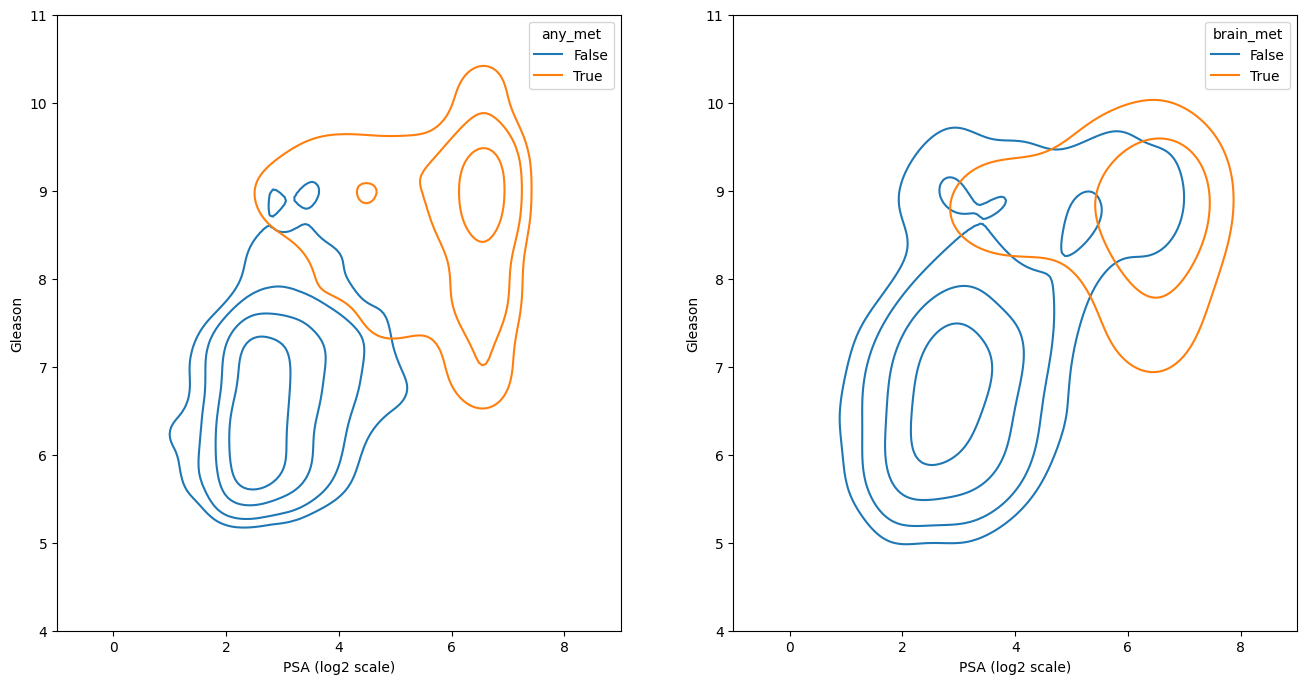

In [51]:
# gleason, PSA 
df = table[table['cancer_group']=='Prostate']
# df = df.dropna(subset=['PSA', 'gleason'])
df['gleason_jitter'] = add_jitter(df['gleason'], 0.5)
df['PSA_log'] = df['PSA'].apply(lambda x: math.log(x+0.01, 2))

df_any = df.dropna(subset=['any_met'])
df_bm = df.dropna(subset=['brain_met'])
df_any = equalise_proportions(df_any, 'any_met')
df_bm = equalise_proportions(df_bm, 'brain_met')

# Set up the figure
f, axes = plt.subplots(1, 2, figsize=(16, 8))

# Draw a contour plot to represent each bivariate density
# fill=True,
# alpha=.7,
# levels=7
sns.kdeplot(data=df_any, x="PSA_log", y="gleason_jitter", hue="any_met", thresh=.2, levels=5, ax=axes[0])
sns.kdeplot(data=df_bm, x="PSA_log", y="gleason_jitter", hue="brain_met", thresh=.2, levels=5, ax=axes[1])

for ax in axes:
    ax.set_xlim(-1, 9)
    ax.set_ylim(4, 11)
    ax.set_ylabel('Gleason')
    ax.set_xlabel('PSA (log2 scale)')

plt.show()


/tmp/ipykernel_13947/1232793740.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged = pd.concat([merged, dfslice1], ignore_index=True)
/tmp/ipykernel_13947/1232793740.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged = pd.concat([merged, dfslice1], ignore_index=True)


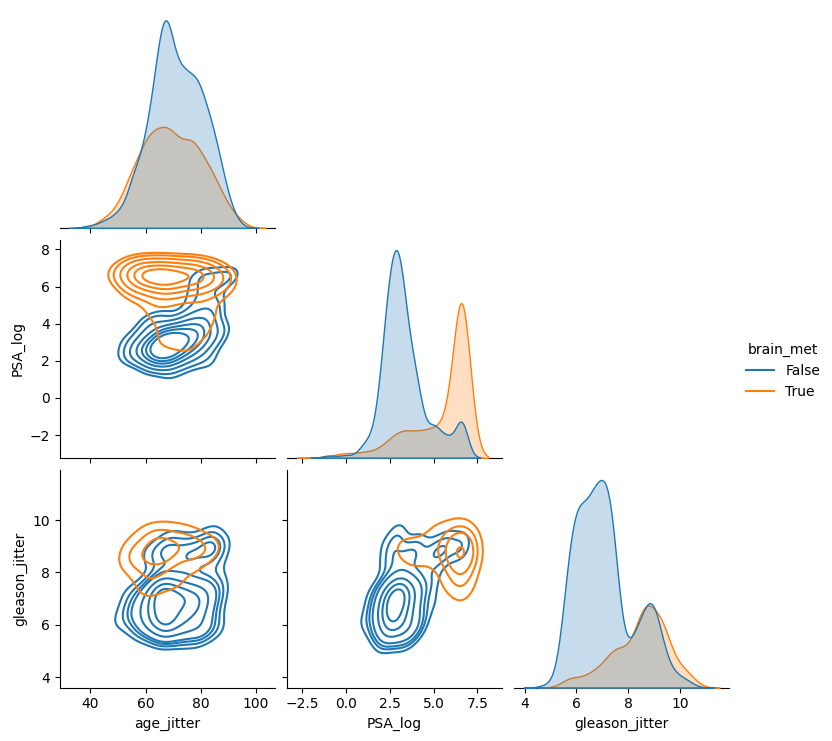

/tmp/ipykernel_13947/1232793740.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged = pd.concat([merged, dfslice1], ignore_index=True)
/tmp/ipykernel_13947/1232793740.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged = pd.concat([merged, dfslice1], ignore_index=True)


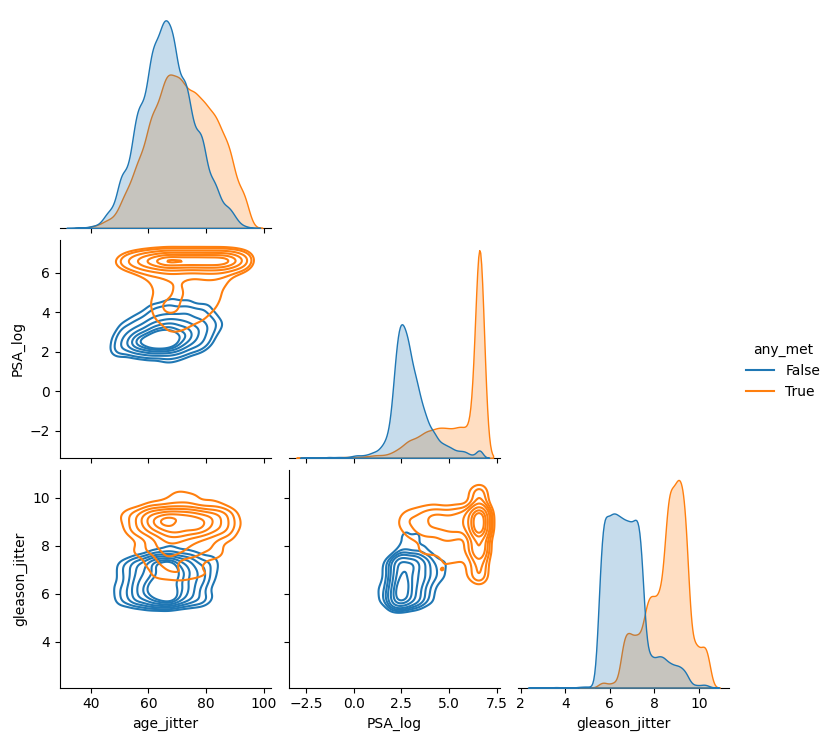

In [ ]:
# gleason, PSA 
df = table[table['cancer_group']=='Prostate'].copy()

# Age 
mask = df['age_numeric'].notna()
df.loc[mask, 'age_jitter'] = add_jitter(df.loc[mask, 'age_numeric'], 2.5)

# PSA
df['PSA_log'] = df['PSA'].apply(lambda x: math.log(x+0.1, 2))

# Gleason 
mask = df['gleason'].notna()
df.loc[mask, 'gleason_jitter'] = add_jitter(df.loc[mask, 'gleason'], 0.5)

fields = ['age_jitter', 'PSA_log', 'gleason_jitter', 'brain_met']
df_bm = df[fields].copy()
df_bm = equalise_proportions(df_bm, 'brain_met')
df_bm = subset_max_records_per_comparison(df_bm, bool_predictor='brain_met')
sns.pairplot(df_bm, kind='kde', hue='brain_met', corner=True, plot_kws={'thresh': 0.2, 'levels': 8})
plt.show()

fields = ['age_jitter', 'PSA_log', 'gleason_jitter', 'any_met']
df_any = df[fields].copy()
df_any = equalise_proportions(df_any, 'any_met')
df_any = subset_max_records_per_comparison(df_any, bool_predictor='any_met')
sns.pairplot(df_any, kind='kde', hue='any_met', corner=True, plot_kws={'thresh': 0.2, 'levels': 8})
plt.show()


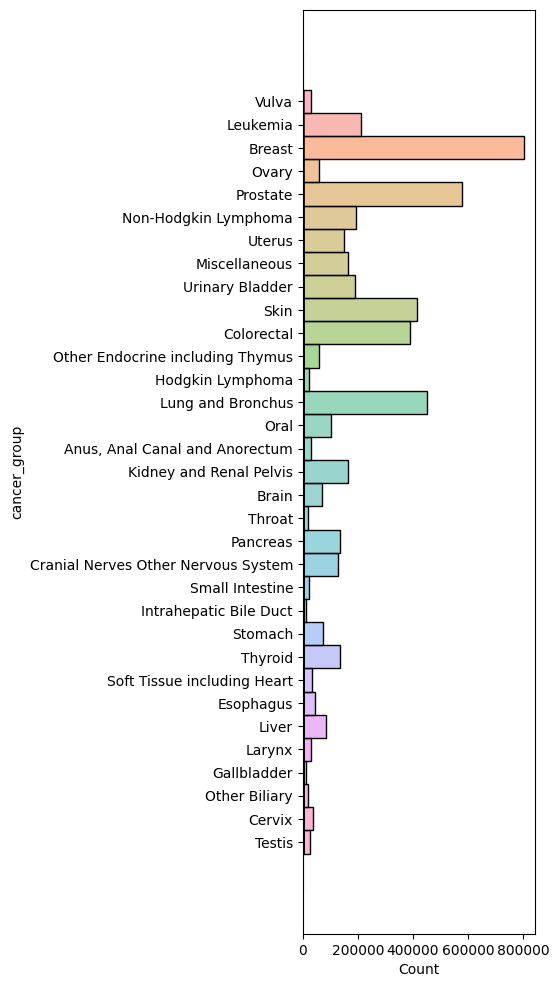

In [ ]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(3, 12))
ax = sns.histplot(table, y='cancer_group', hue='cancer_group', ax=ax, legend=False)
ax.vlines(1000, ax.get_ylim()[0], ax.get_ylim()[1], )
plt.show()


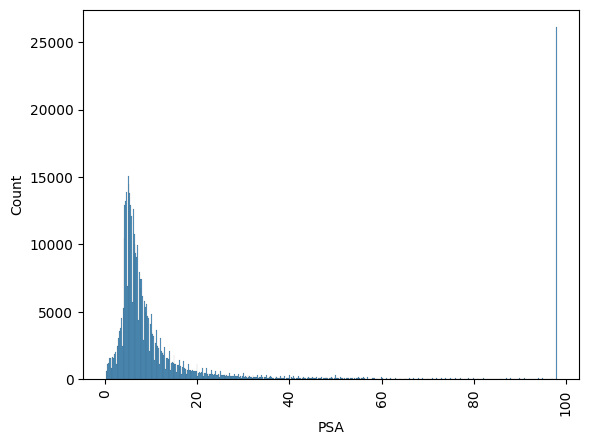

In [74]:
ax = sns.histplot(table, x='PSA')
ax.tick_params(axis='x', rotation=90)
plt.show()

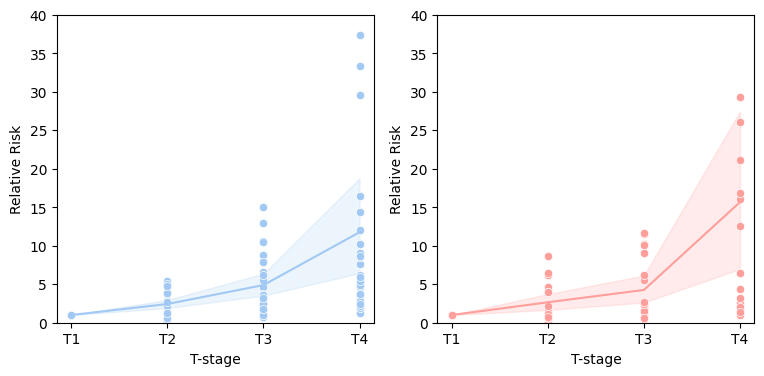

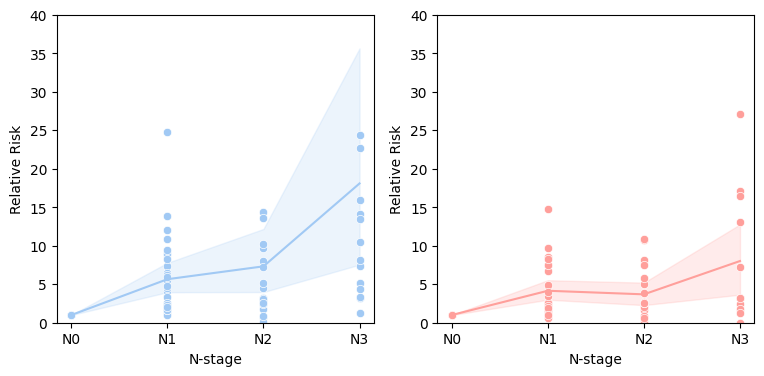

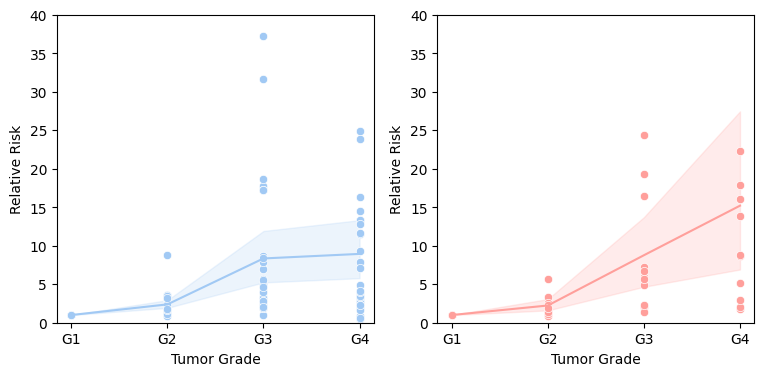

In [ ]:
sns.set_color_codes("pastel")

# TSTAGE
counts_bm = relrisk(table, 'cancer_group', 'TSTAGE_STD', 'brain_met',  'T1', banned=['Tis'])
counts_any = relrisk(table, 'cancer_group', 'TSTAGE_STD', 'any_met',  'T1', banned=['Tis'])
counts_any['pred'] = counts_any['TSTAGE_STD'].apply(lambda x: int(x[-1]))
counts_bm['pred'] = counts_bm['TSTAGE_STD'].apply(lambda x: int(x[-1]))
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
# ax = sns.regplot(data=counts_any, x='pred', y='norm', color='b', order=2) 
sns.lineplot(data=counts_any, x='pred', y='norm', color='b', ax=axes[0]) 
sns.scatterplot(data=counts_any, x='pred', y='norm', color='b', ax=axes[0]) 
sns.lineplot(data=counts_bm, x='pred', y='norm', color='r', ax=axes[1]) 
sns.scatterplot(data=counts_bm, x='pred', y='norm', color='r', ax=axes[1]) 
for ax in axes:
    ax.set_ylim(0, 40)
    ax.set_xticks([1, 2, 3, 4])
    ax.set_xticklabels(['T1', 'T2', 'T3', 'T4'])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlabel('T-stage')
    ax.set_ylabel('Relative Risk')
plt.show()

# NSTAGE
counts_any = relrisk(table, 'cancer_group', 'NSTAGE_STD', 'any_met',  'N0', banned=None)
counts_bm = relrisk(table, 'cancer_group', 'NSTAGE_STD', 'brain_met',  'N0', banned=None)
counts_any['pred'] = counts_any['NSTAGE_STD'].apply(lambda x: int(x[-1]))
counts_bm['pred'] = counts_bm['NSTAGE_STD'].apply(lambda x: int(x[-1]))
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
sns.lineplot(data=counts_any, x='pred', y='norm', color='b', ax=axes[0]) 
sns.scatterplot(data=counts_any, x='pred', y='norm', color='b', ax=axes[0]) 
sns.lineplot(data=counts_bm, x='pred', y='norm', color='r', ax=axes[1]) 
sns.scatterplot(data=counts_bm, x='pred', y='norm', color='r', ax=axes[1]) 
for ax in axes:
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xticklabels(['N0', 'N1', 'N2', 'N3'])
    ax.set_ylim(0, 40)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlabel('N-stage')
    ax.set_ylabel('Relative Risk')
plt.show()

# GRADE
counts_any = relrisk(table, 'cancer_group', 'GRADE_STD', 'any_met',  'G1', banned=['B_CELL', 'T_CELL', 'NK_CELL', 'NULL_CELL'])
counts_bm = relrisk(table, 'cancer_group', 'GRADE_STD', 'brain_met',  'G1', banned=['B_CELL', 'T_CELL', 'NK_CELL', 'NULL_CELL'])
counts_any['pred'] = counts_any['GRADE_STD'].apply(lambda x: int(x[-1]))
counts_bm['pred'] = counts_bm['GRADE_STD'].apply(lambda x: int(x[-1]))
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
sns.lineplot(data=counts_any, x='pred', y='norm', color='b', ax=axes[0]) 
sns.scatterplot(data=counts_any, x='pred', y='norm', color='b', ax=axes[0]) 
sns.lineplot(data=counts_bm, x='pred', y='norm', color='r', ax=axes[1]) 
sns.scatterplot(data=counts_bm, x='pred', y='norm', color='r', ax=axes[1]) 
for ax in axes:
    ax.set_ylim(0, 40)
    ax.set_xticks([1, 2, 3, 4])
    ax.set_xticklabels(['G1', 'G2', 'G3', 'G4'])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlabel('Tumor Grade')
    ax.set_ylabel('Relative Risk')
plt.show()


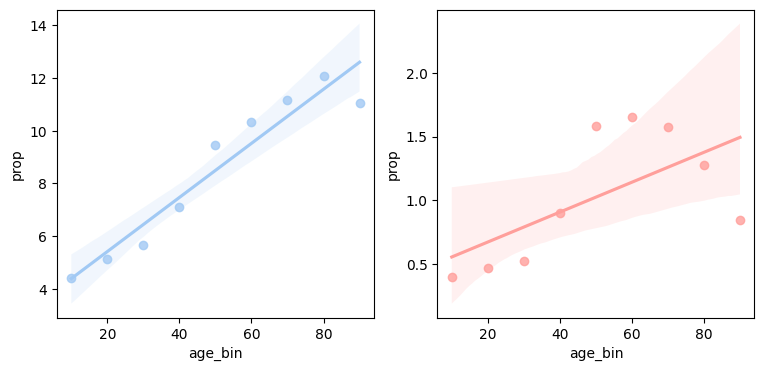

In [ ]:
import math 
mask = table['age'].notna()
table.loc[mask, 'age_bin'] = table.loc[mask, 'age'].apply(lambda x: int(x[:2]))
table.loc[mask, 'age_bin'] = table.loc[mask, 'age_bin'].apply(lambda x: 10*math.floor(x/10))
# table['age_bin'].value_counts()

def binned_proportions(df: pd.DataFrame, predictor: str, response: str, minval: float|None=None) -> pd.DataFrame:
    counts = df.groupby(predictor)[response].value_counts().unstack().fillna(0).astype(int).reset_index()
    counts.columns = [str(x) for x in counts.columns]
    if minval is not None:
        counts = counts[counts[predictor]>=minval]
    counts['prop'] = counts['True'] / (counts['True']+counts['False']) * 100
    return counts

fig, axes = plt.subplots(1, 2, figsize=(9, 4))
counts_any = binned_proportions(table, 'age_bin', 'any_met', minval=10)
counts_bm = binned_proportions(table, 'age_bin', 'brain_met', minval=10)
sns.regplot(data=counts_any, x='age_bin', y='prop', color='b', ax=axes[0]) 
sns.regplot(data=counts_bm, x='age_bin', y='prop', color='r', ax=axes[1]) 
plt.show()


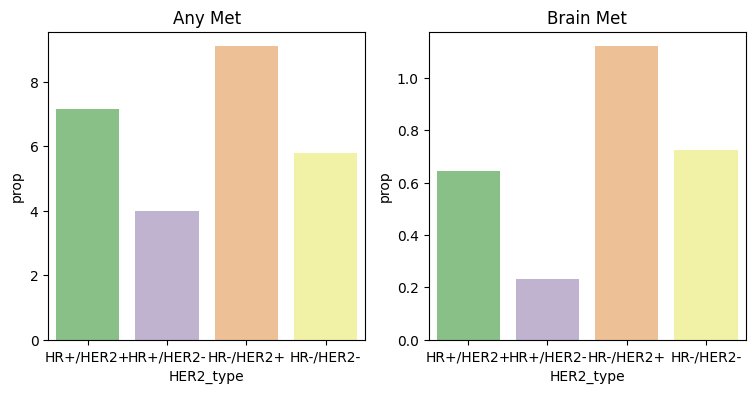


   HER2_type   False   True      prop
0  HR+/HER2+   62179   4779  7.137310
1  HR+/HER2-  439775  18221  3.978419
2  HR-/HER2+   25431   2543  9.090584
3  HR-/HER2-   63532   3894  5.775220

   HER2_type   False  True      prop
0  HR+/HER2+   65867   428  0.645599
1  HR+/HER2-  453089  1057  0.232745
2  HR-/HER2+   27349   310  1.120793
3  HR-/HER2-   66273   483  0.723530


In [111]:
df = table[table['cancer_group']=='Breast']
df = df[df['HER2_type'].notna()]
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
counts_any = df.groupby('HER2_type')['any_met'].value_counts().unstack().fillna(0).astype(int).reset_index()
counts_bm = df.groupby('HER2_type')['brain_met'].value_counts().unstack().fillna(0).astype(int).reset_index()
counts_any.columns = [str(x) for x in counts_any.columns]
counts_bm.columns = [str(x) for x in counts_bm.columns]
counts_any['prop'] = counts_any['True'] / (counts_any['True']+counts_any['False']) * 100
counts_bm['prop'] = counts_bm['True'] / (counts_bm['True']+counts_bm['False']) * 100
sns.barplot(data=counts_any, x='HER2_type', y='prop', hue='HER2_type', palette='Accent', ax=axes[0])
sns.barplot(data=counts_bm, x='HER2_type', y='prop', hue='HER2_type', palette='Accent', ax=axes[1])
axes[0].set_title('Any Met')
axes[1].set_title('Brain Met')
plt.show()
print()
print(counts_any)
print()
print(counts_bm)

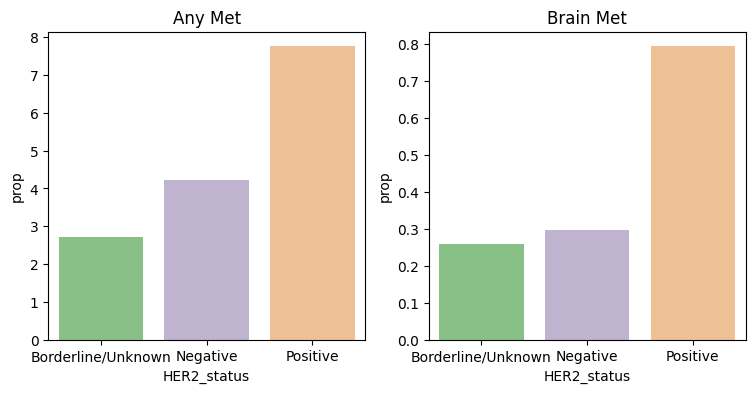


          HER2_status   False   True      prop
0  Borderline/Unknown  176347   4928  2.718522
1            Negative  504122  22276  4.231779
2            Positive   87927   7392  7.755012

          HER2_status   False  True      prop
0  Borderline/Unknown  171973   447  0.259251
1            Negative  520257  1556  0.298191
2            Positive   93568   749  0.794130


In [112]:
df = table[table['cancer_group']=='Breast']
df = df[df['HER2_status'].notna()]
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
counts_any = df.groupby('HER2_status')['any_met'].value_counts().unstack().fillna(0).astype(int).reset_index()
counts_bm = df.groupby('HER2_status')['brain_met'].value_counts().unstack().fillna(0).astype(int).reset_index()
counts_any.columns = [str(x) for x in counts_any.columns]
counts_bm.columns = [str(x) for x in counts_bm.columns]
counts_any['prop'] = counts_any['True'] / (counts_any['True']+counts_any['False']) * 100
counts_bm['prop'] = counts_bm['True'] / (counts_bm['True']+counts_bm['False']) * 100
sns.barplot(data=counts_any, x='HER2_status', y='prop', hue='HER2_status', palette='Accent', ax=axes[0])
sns.barplot(data=counts_bm, x='HER2_status', y='prop', hue='HER2_status', palette='Accent', ax=axes[1])
axes[0].set_title('Any Met')
axes[1].set_title('Brain Met')
plt.show()
print()
print(counts_any)
print()
print(counts_bm)

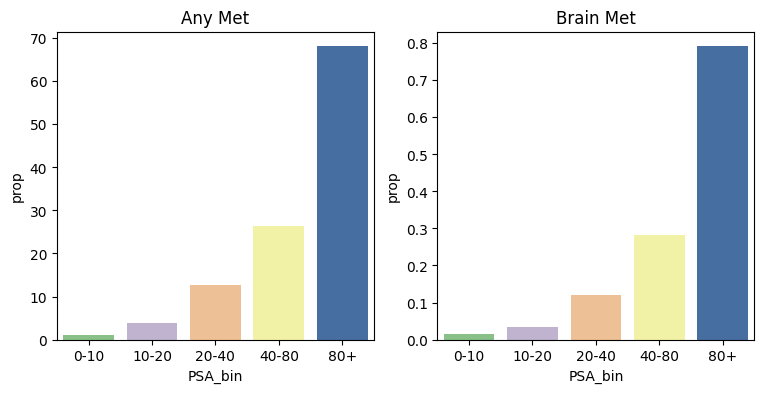


  PSA_bin   False   True       prop
0    0-10  317887   3141   0.978419
1   10-20   76314   3150   3.964059
2   20-40   25525   3679  12.597589
3   40-80   11392   4073  26.336890
4     80+    9423  20109  68.092239

  PSA_bin   False  True      prop
0    0-10  314334    50  0.015904
1   10-20   77626    27  0.034770
2   20-40   28380    34  0.119659
3   40-80   14850    42  0.282031
4     80+   27824   222  0.791557


In [13]:
# 0-10, 
df = table[table['cancer_group']=='Prostate']
df = df[df['PSA'].notna()]

# def get_psa_bin(psa: float) -> str:
#     if psa == 98.0:
#         return '98+'
#     tens_floor = math.floor(psa/10)*10
#     return f"{tens_floor} - {tens_floor+10}"

def get_psa_bin(psa: float) -> str:
    if psa >= 80:
        return '80+'
    elif psa >= 40:
        return '40-80'
    elif psa >= 20:
        return '20-40'
    elif psa >= 10:
        return '10-20'
    else:
        assert psa < 10
        return '0-10'

# df['PSA_bin'] = df['PSA'].apply(lambda x: round(x/n)*n)
# df['PSA_log'] = df['PSA'].apply(lambda x: math.log(x))
df['PSA_bin'] = df['PSA'].apply(get_psa_bin)

fig, axes = plt.subplots(1, 2, figsize=(9, 4))
counts_any = df.groupby('PSA_bin')['any_met'].value_counts().unstack().fillna(0).astype(int).reset_index()
counts_bm = df.groupby('PSA_bin')['brain_met'].value_counts().unstack().fillna(0).astype(int).reset_index()
counts_any.columns = [str(x) for x in counts_any.columns]
counts_bm.columns = [str(x) for x in counts_bm.columns]
counts_any['prop'] = counts_any['True'] / (counts_any['True']+counts_any['False']) * 100
counts_bm['prop'] = counts_bm['True'] / (counts_bm['True']+counts_bm['False']) * 100
sns.barplot(data=counts_any, x='PSA_bin', y='prop', hue='PSA_bin', palette='Accent', ax=axes[0])
sns.barplot(data=counts_bm, x='PSA_bin', y='prop', hue='PSA_bin', palette='Accent', ax=axes[1])
axes[0].set_title('Any Met')
axes[1].set_title('Brain Met')
plt.show()
print()
print(counts_any)
print()
print(counts_bm)

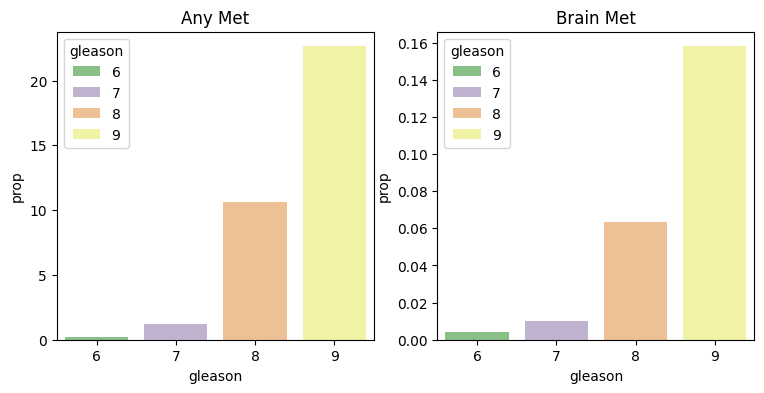


   gleason   False   True       prop
0        6  180711    411   0.226919
1        7  232929   2928   1.241430
2        8   44069   5240  10.626863
3        9   45359  13272  22.636489

   gleason   False  True      prop
0        6  171668     7  0.004077
1        7  229223    23  0.010033
2        8   47169    30  0.063561
3        9   56240    89  0.158000


In [118]:
df = table[table['cancer_group']=='Prostate']
df = df[df['gleason'].notna()]
df['gleason'] = df['gleason'].astype(int)
df['gleason'] = df['gleason'].clip(lower=6, upper=9)
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
counts_any = df.groupby('gleason')['any_met'].value_counts().unstack().fillna(0).astype(int).reset_index()
counts_bm = df.groupby('gleason')['brain_met'].value_counts().unstack().fillna(0).astype(int).reset_index()
counts_any.columns = [str(x) for x in counts_any.columns]
counts_bm.columns = [str(x) for x in counts_bm.columns]
counts_any['prop'] = counts_any['True'] / (counts_any['True']+counts_any['False']) * 100
counts_bm['prop'] = counts_bm['True'] / (counts_bm['True']+counts_bm['False']) * 100
sns.barplot(data=counts_any, x='gleason', y='prop', hue='gleason', palette='Accent', ax=axes[0])
sns.barplot(data=counts_bm, x='gleason', y='prop', hue='gleason', palette='Accent', ax=axes[1])
axes[0].set_title('Any Met')
axes[1].set_title('Brain Met')
plt.show()
print()
print(counts_any)
print()
print(counts_bm)

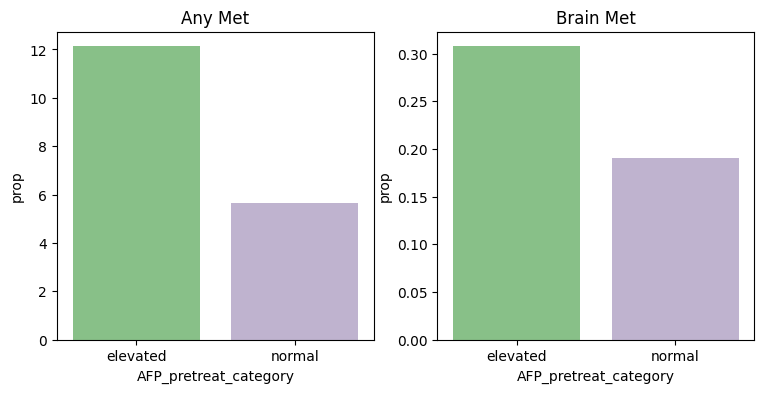


  AFP_pretreat_category  False  True       prop
0              elevated  34422  4750  12.126008
1                normal  15669   937   5.642539

  AFP_pretreat_category  False  True      prop
0              elevated  37918   117  0.307611
1                normal  16277    31  0.190091


In [124]:
df = table[table['cancer_group']=='Liver']
df = df[df['AFP_pretreat_category'].notna()]
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
counts_any = df.groupby('AFP_pretreat_category')['any_met'].value_counts().unstack().fillna(0).astype(int).reset_index()
counts_bm = df.groupby('AFP_pretreat_category')['brain_met'].value_counts().unstack().fillna(0).astype(int).reset_index()
counts_any.columns = [str(x) for x in counts_any.columns]
counts_bm.columns = [str(x) for x in counts_bm.columns]
counts_any['prop'] = counts_any['True'] / (counts_any['True']+counts_any['False']) * 100
counts_bm['prop'] = counts_bm['True'] / (counts_bm['True']+counts_bm['False']) * 100
sns.barplot(data=counts_any, x='AFP_pretreat_category', y='prop', hue='AFP_pretreat_category', palette='Accent', ax=axes[0])
sns.barplot(data=counts_bm, x='AFP_pretreat_category', y='prop', hue='AFP_pretreat_category', palette='Accent', ax=axes[1])
axes[0].set_title('Any Met')
axes[1].set_title('Brain Met')
plt.show()
print()
print(counts_any)
print()
print(counts_bm)

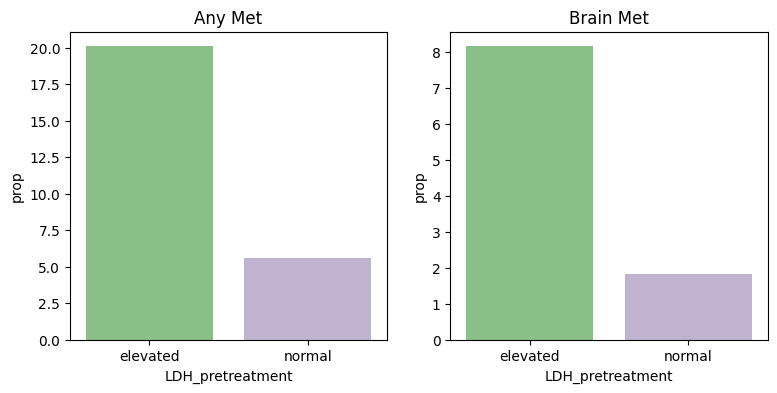


  LDH_pretreatment  False  True       prop
0         elevated   3605   907  20.101950
1           normal  10843   640   5.573456

  LDH_pretreatment  False  True      prop
0         elevated   4115   365  8.147321
1           normal  11235   209  1.826285


In [126]:
df = table[table['cancer_group']=='Skin']
df = df[df['LDH_pretreatment'].notna()]
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
counts_any = df.groupby('LDH_pretreatment')['any_met'].value_counts().unstack().fillna(0).astype(int).reset_index()
counts_bm = df.groupby('LDH_pretreatment')['brain_met'].value_counts().unstack().fillna(0).astype(int).reset_index()
counts_any.columns = [str(x) for x in counts_any.columns]
counts_bm.columns = [str(x) for x in counts_bm.columns]
counts_any['prop'] = counts_any['True'] / (counts_any['True']+counts_any['False']) * 100
counts_bm['prop'] = counts_bm['True'] / (counts_bm['True']+counts_bm['False']) * 100
sns.barplot(data=counts_any, x='LDH_pretreatment', y='prop', hue='LDH_pretreatment', palette='Accent', ax=axes[0])
sns.barplot(data=counts_bm, x='LDH_pretreatment', y='prop', hue='LDH_pretreatment', palette='Accent', ax=axes[1])
axes[0].set_title('Any Met')
axes[1].set_title('Brain Met')
plt.show()
print()
print(counts_any)
print()
print(counts_bm)

In [85]:
for i, col in enumerate(table.columns):
    print(f"{i}\t{col}")

0	patient_id
1	record_number
2	behavior
3	sex
4	age
5	diagnosis_year
6	death_year
7	survival_months
8	COD
9	cancer_type
10	cancer_group
11	primary_type
12	primary_group
13	hist_type
14	hist_group
15	TSTAGE_STD
16	NSTAGE_STD
17	GSTAGE_STD
18	GRADE_STD
19	regional_nodes
20	chr19q_loh
21	chr1p_loh
22	B_symptoms
23	PSA
24	gleason
25	AFP_post_orchiectomy
26	AFP_pretreat_category
27	hGC_post_orchiectomy_elevation
28	LDH_post_orchiectomy_elevation
29	LDH_pretreatment
30	HER2_type
31	HER2_status
32	breslow_thick
33	ovarian_CA125
34	CEA_pretreat
35	fibrosis_score
36	adrenal_involvement
37	major_vein_involvement
38	mitotic_rate_melanoma
39	capsule_invasion
40	perineural_invasion
41	peripheral_blood_involvement
42	peritoneal_cytology
43	pleural_effusion
44	pleural_invasion
45	ulceration
46	tumor_deposits
47	brain_met
48	bone_met
49	liver_met
50	lung_met
51	distant_ln_met
52	other_met
53	any_met
